<a href="https://colab.research.google.com/github/yugawala/shakyo/blob/main/%E3%82%B9%E3%83%A9%E3%82%B9%E3%83%A9%E3%82%8F%E3%81%8B%E3%82%8B%E3%83%99%E3%82%A4%E3%82%BA%E6%8E%A8%E8%AB%96%E5%86%99%E7%B5%8C_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4章

In [1]:
import pymc as pm
import arviz as az

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

import japanize_matplotlib

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
X = np.array([1, 0, 0, 1, 0])
print(X)

[1 0 0 1 0]


In [3]:
model1 = pm.Model()

with model1:
  p = pm.Uniform('p', lower=0, upper=1)
  x_obs = pm.Bernoulli('x_obs', p, observed=X)

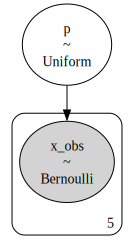

In [4]:
g = pm.model_to_graphviz(model1)
display(g)

## サンプリング
ここからサンプリング。MCMCに基づいて実施され、観測値を満たすようなサンプル値の計算が行われる
サンプリングは前の値の影響を強く受けるため、乱数の影響で初期のサンプル値が偏った場合、後続の値が偏る。
その偏りを認識して除外できるよう、何度か試行してみる仕組みがchains。
また、MCMCの性質として、初期の値は不安定がちになり、のちに定常状態に落ち着くというものがある。そのため、初期の方の値は不安定がちなので捨てて、推論ではのちの値のみを使う。
初期の方の値はtune、のちの値はdrawsという。

In [5]:
with model1:
  idata1_1 = pm.sample(chains=3, tune=2000, draws=2000, random_seed=42)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 4 jobs)
NUTS: [p]


Output()

Sampling 3 chains for 2_000 tune and 2_000 draw iterations (6_000 + 6_000 draws total) took 1 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


In [6]:
with model1:
  idata1_2 = pm.sample(random_seed=42)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 0 seconds.


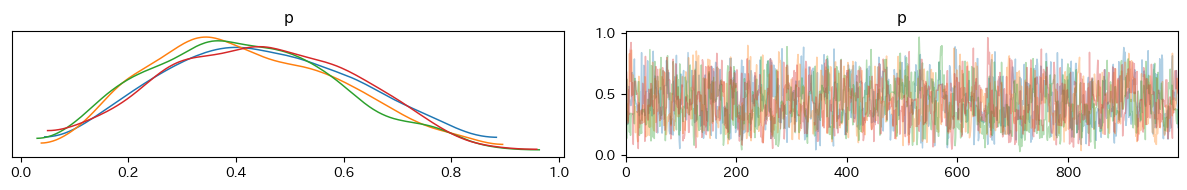

In [7]:
az.plot_trace(idata1_2, compact=False)
plt.tight_layout()

# このとき、chainごとのグラフの形に差がありすぎる場合はモデルの組み方を疑う必要

Text(0.5, 1.0, 'ベイズ推論結果 初期版')

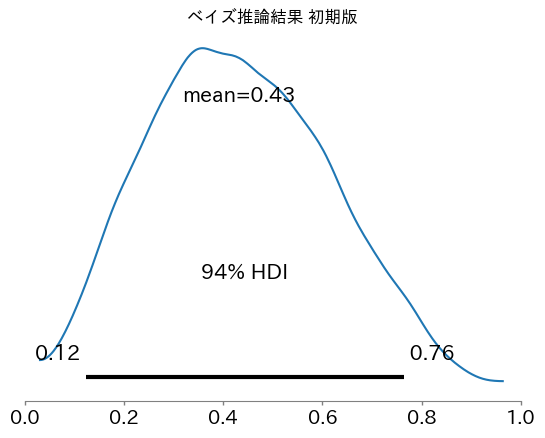

In [8]:
az.plot_posterior(idata1_2)
plt.xlim(0, 1)
plt.title('ベイズ推論結果 初期版')

In [9]:
summary1_2 = az.summary(idata1_2)
display(summary1_2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.432,0.177,0.123,0.764,0.004,0.003,1662.0,2567.0,1.0


In [10]:
model2 = pm.Model()

with model2:
  p = pm.Uniform('p', lower=0, upper=1)
  x_obs = pm.Binomial('x_obs', n=5, p=p, observed=X.sum())

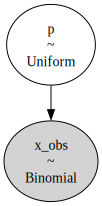

In [11]:
g = pm.model_to_graphviz(model2)
display(g)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 4 jobs)
NUTS: [p]


Output()

Sampling 3 chains for 2_000 tune and 2_000 draw iterations (6_000 + 6_000 draws total) took 1 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


Text(0.5, 1.0, 'ベイズ推論結果')

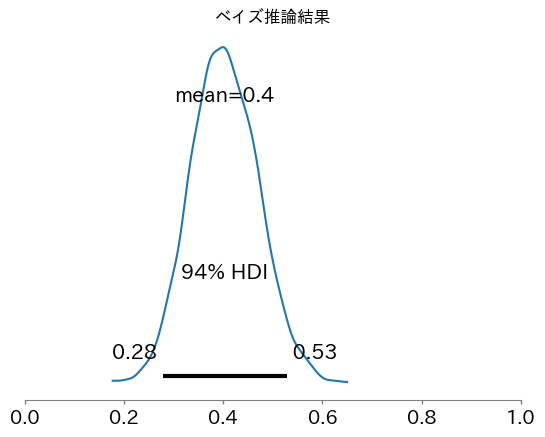

In [12]:
model3 = pm.Model()

with model3:
  p = pm.Uniform('p', lower=0, upper=1)
  x_obs = pm.Binomial('x_obs', n=5*10, p=p, observed=X.sum()*10)
  idata3 = pm.sample(chains=3, tune=2000, draws=2000, random_seed=42)

az.plot_posterior(idata3)
plt.xlim(0, 1)
plt.title('ベイズ推論結果')